In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
plt.style.use(['fivethirtyeight'])

In [9]:
pop_const = 314
video_df = pd.read_csv('videodata.txt', delim_whitespace=True)

In [10]:
video_df.head()

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
0,2.0,3,3,2,0,1,0,19,1,0,10,1,0,1,4
1,0.0,3,3,3,0,0,0,18,1,1,0,1,1,1,2
2,0.0,3,1,3,0,0,1,19,1,0,0,1,0,1,3
3,0.5,3,3,3,0,1,0,19,1,0,0,1,0,1,3
4,0.0,3,3,4,0,1,0,19,1,1,0,0,0,1,3


## (Scenario 4?) Bootstrap of Time Spent Playing Video Games 

In [44]:
groups = video_df.groupby('time').groups
proportions = {time: int(np.floor((len(g) * 1.0 / 91) * pop_const)) for time, g in groups.items()}
weights = [proportions[t] for t in video_df.time.values[:]]
boot_pop = video_df.groupby('time').apply(lambda g: g.sample(n=proportions[g.time.values[0]], replace=True))

In [45]:
bootstrap_means = [np.mean(boot_pop.sample(91, replace=True).time.values[:]) for i in range(2000)]

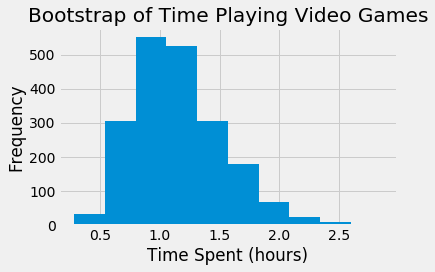

In [46]:
plt.hist(bootstrap_means)

plt.title('Bootstrap of Time Playing Video Games')
plt.xlabel('Time Spent (hours)')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('boostrapped_time_spent', dpi=420)
plt.show()

In [47]:
mean = np.mean(bootstrap_means)
s = 1/(91-1)*np.sum([(x - mean)**2 for x in bootstrap_means])


# Dependence biased std
s

# Dependence fixed variance
((s**2)*(len(boot_pop.time) - 91))/(len(boot_pop)*91)

sd = np.sqrt(((s**2)*(len(boot_pop.time) - 91))/(len(boot_pop)*91))

c_hi = np.mean(bootstrap_means) + sd*1.96

c_lo = np.mean(bootstrap_means) - sd*1.96

print("(%f,%d)" %(c_hi, c_lo))

In [24]:
#(len(boot_pop.time)* 91)

28119

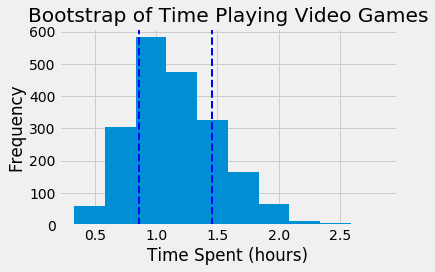

In [32]:
plt.hist(bootstrap_means)

plt.title('Bootstrap of Time Playing Video Games')
plt.xlabel('Time Spent (hours)')
plt.ylabel('Frequency')
plt.tight_layout()

line_kwargs = {'linewidth' : 2, 'linestyle' :'dashed'}
plt.axvline(**line_kwargs, x=c_lo, color='blue', label='Mean Proportion')
plt.axvline(**line_kwargs, x=c_hi, color='blue', label='Mean Proportion')

plt.savefig('boostrapped_time_spent', dpi=420)
plt.show()

In [33]:
c_lo

0.86141302664518404

In [34]:
c_hi

1.4526122480800909

In [ ]:
print("point estimate", np.mean(bootstrap_means))
stderr = np.sqrt(np.mean(bootstrap_means) * (1- np.mean(bootstrap_means))) / np.sqrt(len(video_df)-1)
CI_lb = (np.mean(bootstrap_means) - (1.96*stderr))
CI_up = (np.mean(bootstrap_means) + (1.96*stderr))
IE = (CI_lb, CI_up)
print("interval estimate:", IE)

## (Scenario 1) Bootstrapped Proportions 

In [11]:
video_df.loc[ (video_df.time >=1), 'time' ] = 1.0

In [12]:
groups = video_df.groupby('time').groups

In [13]:
groups = video_df.groupby('time').groups
proportions = {time: int(np.floor((len(g) * 1.0 / 91) * pop_const)) for time, g in groups.items()}
weights = [proportions[t] for t in video_df.time.values[:]]
boot_pop = video_df.groupby('time').apply(lambda g: g.sample(n=proportions[g.time.values[0]], replace=True))

In [14]:
bootstrap_means = [np.mean(boot_pop.sample(91, replace=True).time.values[:]) for i in range(2000)]

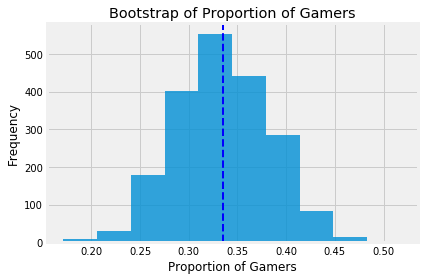

mean 0.3356032967032967
interval estimate: (0.23804557259951933, 0.4331610208070741)


In [39]:
plt.hist(bootstrap_means, alpha=0.8)
line_kwargs = {'linewidth' : 2, 'linestyle' :'dashed'}
plt.axvline(**line_kwargs, x=np.mean(bootstrap_means), color='blue', label='Mean Proportion')

plt.title('Bootstrap of Proportion of Gamers')
plt.xlabel('Proportion of Gamers')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('boostrapped_proportion', dpi=420)
plt.show()
print("point estimate", np.mean(bootstrap_means))
stderr = np.sqrt(np.mean(bootstrap_means) * (1- np.mean(bootstrap_means))) / np.sqrt(len(video_df)-1)
CI_lb = (np.mean(bootstrap_means) - (1.96*stderr))
CI_up = (np.mean(bootstrap_means) + (1.96*stderr))
IE = (CI_lb, CI_up)
print("interval estimate:", IE)

In [34]:
CI_lb

0.23804557259951933

In [35]:
CI_up

0.4331610208070741

## Part 5

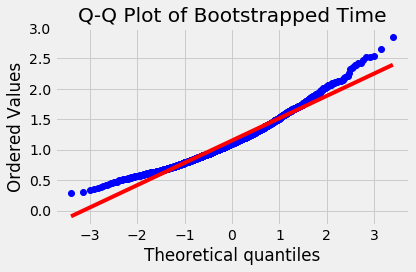

In [48]:
from scipy.stats import probplot
probplot(bootstrap_means, plot=plt)

plt.title('Q-Q Plot of Bootstrapped Time')
plt.tight_layout()
plt.savefig('qq_boostrapped_time_spent', dpi=420)

plt.show()

In [52]:
from scipy.stats import skew
skew(bootstrap_means)

0.7074124299397307

In [49]:
from scipy.stats import kurtosis
kurtosis(bootstrap_means, fisher=False)

3.5592567232309076

## (Scenario 6)
Just for fun, further investigate the grade that students expect in the course. How does it match the standard distribution used in grade assignment (20% A’s, 30% B’s, 40% C’s and 10% D’s or lower)? 


If the nonrespondents were failing students who no longer bothered to come to the discussion section, would this change the picture ?

## videodata variable meanings

* Time : # of hours played in the week prior to survey
* Like to play : 1=never played, 2=very much, 3=somewhat, 4=not really, 5=not at all.
* Where play : 1=arcade, 2=home system, 3=home computer, 4=arcade and either
home computer of system, 5= home computer and system, 6=all three.
* How often : 1=daily, 2=weekly, 3=monthly, 4=semesterly.
* Play if busy : 1=yes, 0=no.
* Playing educational : 1=yes, 0=no.
* Sex : 1=male, 0=female.
* Age : Students age in years.
* Computer at home : 1=yes, 0=no.
* Hate math: 1=yes, 0=no.
* Work: # of hours worked the week prior to the survey.
* Own PC : 1=yes, 0=no.
* PS has CD-Rom: 1=yes, 0=no.
* Have email : 1=yes, 0=no.
* Grade expected : 4=A,3=B,2=C,1=D,0=F.

In [40]:
max(video_df.age)

33

In [38]:
max(video_df.work)

99

In [72]:
# Reload the data
pop_const = 314
video_df = pd.read_csv('videodata.txt', delim_whitespace=True)
video_df.head()

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
0,2.0,3,3,2,0,1,0,19,1,0,10,1,0,1,4
1,0.0,3,3,3,0,0,0,18,1,1,0,1,1,1,2
2,0.0,3,1,3,0,0,1,19,1,0,0,1,0,1,3
3,0.5,3,3,3,0,1,0,19,1,0,0,1,0,1,3
4,0.0,3,3,4,0,1,0,19,1,1,0,0,0,1,3


In [73]:
list(set(video_df.grade))

[2, 3, 4]

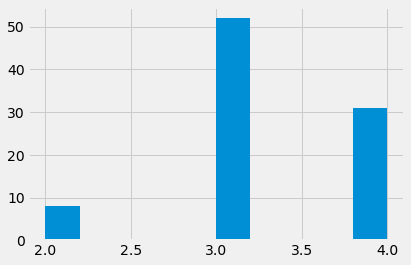

In [83]:
plt.hist(video_df.grade)
plt.show()

In [88]:
from collections import Counter
Counter(video_df.grade)

Counter({2: 8, 3: 52, 4: 31})

In [76]:
.1*len(video_df)

9.1

In [77]:
A = 2/9
B = 3/9
C = 4/9

In [84]:
31/91

0.34065934065934067